# Project 1

## Step 1: Run pseudoexperiments for 10000 events

- the pdf is: $$p(t;\tau, \Delta m, V) \propto (1 + V\sin{\Delta m t}) e^{-\frac{t}{\tau}}$$
- nominal values are: $$\tau = 1.5\times 10^{-6}\ \text{s} $$ $$\Delta m = 20\times 10^{6}\ \text{s} $$ $$V = 0.1$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from scipy.interpolate import interp1d
from iminuit import Minuit # for the minimising
from iminuit.cost import UnbinnedNLL # for obtaining the NLL when we have unbinned data
from scipy import stats

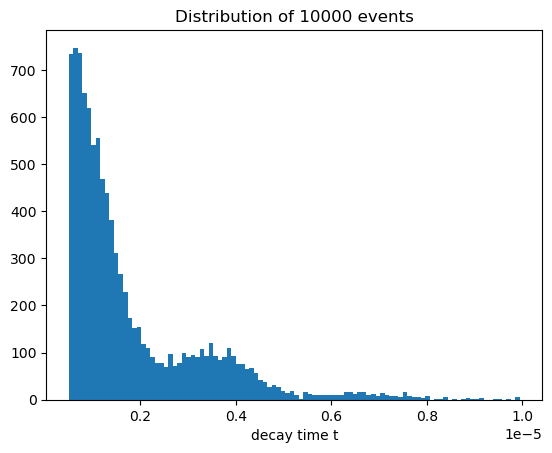

In [ ]:

# nominal parameter values
tau_nom = 1.5e-6
dm_nom = 20e5
V_nom = 0.5 # takes 0 if universe non-symmetric

bounds = [5e-7, 1e-5] # range of t values in which to generate data


# define pdf (not normalised)
def pdf(t, tau, dm, V):
    return (1 + V*np.sin(dm*t))*np.exp(-t/tau)


# normalisation constant for pdf
N = integrate.quad(pdf, bounds[0], bounds[1], args=(tau_nom, dm_nom, V_nom))[0] # index 0 so as not to include the error


# define normalised pdf
def norm_pdf(t, tau, dm, V):
    return pdf(t, tau, dm, V) / N


# define cdf
def cdf(x, tau, dm, V):
    return integrate.quad(norm_pdf, bounds[0], x, args=(tau, dm, V))[0] # integrate from lower bound to given x


# generate interpolation points within the given bounds
x = np.linspace(bounds[0], bounds[1], 1000) 


# calculate the cdf values at these x values
cdf_values = np.array([cdf(i, tau_nom, dm_nom, V_nom) for i in x])


# generate random r's in the range [0,1], i.e the amount of samples
r = np.random.rand(10000)


# perform inverse transform sampling
interpolator = interp1d(cdf_values, x)
samples = interpolator(r)


# plot the histogram
plt.hist(samples, bins=100)
plt.title("Distribution of 10000 events")
plt.xlabel("decay time t")
plt.show()


# Fit a curve to this distribution
- using iminuit

In [126]:

# use iminuit to fit 
NLL = UnbinnedNLL(samples, norm_pdf) # the NLL
m = Minuit(NLL, tau=tau_nom, dm=dm_nom, V=V_nom) # initial values as nominal values

m.migrad()  # find minimum
m.hesse()   # compute uncertainties

c:\Users\callu\anaconda3\envs\daml-environment\Lib\site-packages\iminuit\cost.py:168: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.sort(np.log(x + _TINY_FLOAT)))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.77e+05                  │              Nfcn = 556              │
│ EDM = 0.000201 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │     2     │     2     │            │            │         │         │       │
│ 1 │ dm   │1.8415249e6│0.0000020e6│            │            │         │         │       │
│ 2 │ V    │   0.798   │   0.009   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────────────────────────┐
│     │      tau       dm        V │
├─────┼────────────────────────────┤
│ tau │        4        0        0 │
│  dm │        0        4        0 │
│   V │        0        0 7.41e-05 │
└─────┴────────────────────────────┘

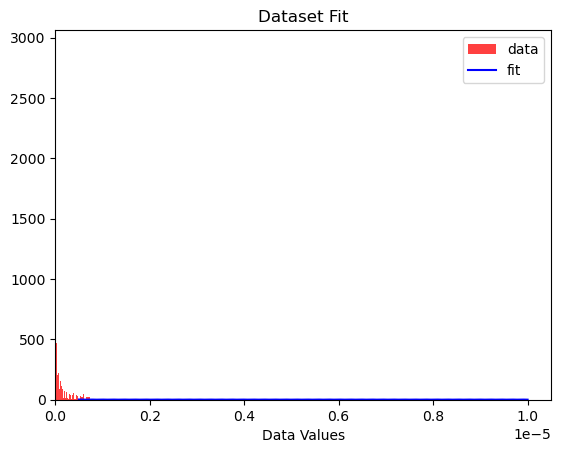

In [41]:
y_model = pdf(t, m.values["tau"], m.values["dm"], m.values["V"])


# plot the data and the fitted curve
plt.hist(y_norm, bins=100, color="red", alpha = 0.75, label="data") 
plt.plot(t, y_model, color="blue", label="fit")

plt.xlim(0,)
plt.xlabel("Data Values")
plt.title("Dataset Fit")
plt.legend()
plt.show()


In [14]:
X = stats.Uniform(a=-0.5, b=0.5)
print(X.icdf(0.99))


# Generate random uniform samples
uniform_samples = np.random.uniform(0, 1, 1000)

0.49
